<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

from scipy.stats import beta   
import pylab as plt

from bayes import *


In [2]:
# datos

df_cookie = pd.read_csv ('/Users/edgarahmed/Desktop/ironhack/semana_6/dia_4/6.4-lab_ab_testing/data/cookie_cats.csv')

df_cookie.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df_cookie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## Primero la conversión en 1 día. Retention_1

In [4]:
#Obtenemos las impresiones (que serán los "True") y el tráfico total (trues+flases)

pd.crosstab(df_cookie.version, df_cookie.retention_1)


retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [5]:
# testeo para retention_1
#tasa de conversión al día 1.

imps_ctrl_30, convs_ctrl_30 = 44700, 20034

imps_test_40, convs_test_40 = 45489, 20119 

CR_ctrl = convs_ctrl_30/imps_ctrl_30
CR_test = convs_test_40/imps_test_40

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

El control (gate 30) pone la conversión al 44,8%. En el Test (gate 40) 44,2%. Es decir, de los que llegan al nivel 30 esperan o compran/pagan el juego el 44,8%. De los que llegan al nivel 40 el 44,2%.

In [6]:
a_C, b_C = 1+convs_ctrl_30, 1+imps_ctrl_30-convs_ctrl_30

a_T, b_T = 1+convs_test_40, 1+imps_test_40-convs_test_40


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [7]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [8]:
def plot(betas, names, linf=0.435, lsup=0.46):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

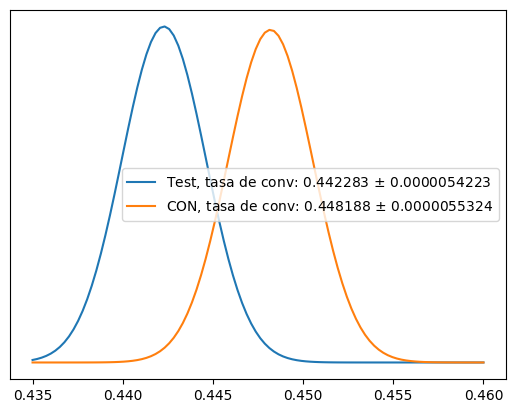

In [9]:
plot([beta_test, beta_control], ['Test', 'CON'])

In [10]:
# testeo para retention_7
#repetimos el proceso pero ahora, con los valores a los 7 dias. 

pd.crosstab(df_cookie.version, df_cookie.retention_7)


retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [11]:
#tasa de conversión al día 7.

imps_ctrl_30_7, convs_ctrl_30_7 = 44700, 8502

imps_test_40_7, convs_test_40_7 = 45489, 8279 

CR_ctrl = convs_ctrl_30_7/imps_ctrl_30_7
CR_test = convs_test_40_7/imps_test_40_7

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'


'Tasas conversion: Control: 0.19020134228187918, Test: 0.18200004396667327'

En este caso vemos que las tasas de conversión son más bajas. 19% para el control y 18,2% para la puerta 40. 

In [12]:
a_C, b_C = 1+convs_ctrl_30_7, 1+imps_ctrl_30_7-convs_ctrl_30_7

a_T, b_T = 1+convs_test_40_7, 1+imps_test_40_7-convs_test_40_7


beta_control_7= beta(a_C, b_C)

beta_test_7= beta(a_T, b_T)

In [16]:
beta_control_7.mean(), beta_test_7.mean()

(0.19021520289919913, 0.18201402475214878)

In [17]:
def plot(betas, names, linf=0.17, lsup=0.2):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

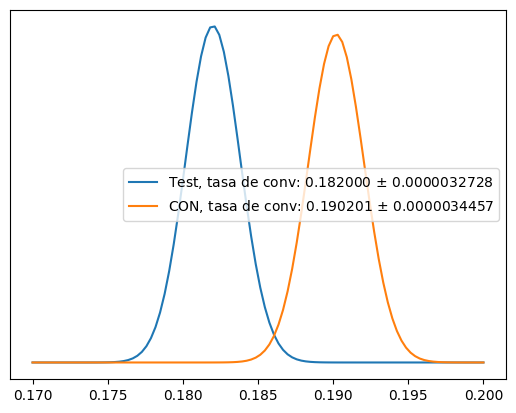

In [19]:
plot([beta_test_7, beta_control_7], ['Test', 'CON'])

In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.

Las conclusiones que podemos sacar son las siguientes.

1. La mejor tasa de conversión está en la puerta 30 en el primer día. 
2. Las tasas de conversión a 7 días son inferiores, tanto en la puerta 30 como en la puerta 40, camparado con los valores de la conversión del día 1. 